# Estudio espectral de los polinomios discretos de Legendre


En este cuaderno graficamos información relacionada con el estudio de oscilaciones de los polinomios discretos de Legendre $\mathcal{L}^{n,k}$
(siendo $n$ la dimensión del polinomio y $k$ su grado) via representaciones en sistemas de oscilaciones.


⚫ NOTA: recuerda que todo lo implementado hasta ahora usa la base de Fourier clásica (que es una BON de $\mathbb{R}^{n}$).

⚫ TODO: no has implementado los cambios en la base de Frecuencias en el script 'base_fourier_V0' que importas aquí!

▶ Importando módulos


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab #Para usar LaTeX en captions
import math
import random

pi=math.pi

In [ ]:
#Instrucciones necesarias para importar los módulos que yo escribí.

# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

# Insert the directory
import sys
sys.path.insert(0, '/content/drive/My Drive/tesis-amelie-ipynb') #TODO: esta ruta depende de mi cuenta de google, verdad?
#Si alguien más quisiera correr este jupyter notebook debería de guardarlos todos en su Drive y cambiar esta ruta?



#Gracias a https://medium.com/analytics-vidhya/importing-your-own-python-module-or-python-file-into-colab-3e365f0a35ec :)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import minimos_cuadrados
import base_fourier_V1
import base_fourier_V0
import nueva_base_fourier_V0

import funciones_estudioEspectral 
import base_legendreDiscreta as legendre

#array en el que guardo los colores que usaré para graficar.
colores_amelie=['hotpink', 'mediumpurple', 'darkturquoise', 'darkcyan', 'blue', 'red']

▶ **Gráfica 1**: Análisis de un polinomio discreto de Legendre.

Input: $n \in \mathbb{N}$, $0 \leq k \leq n-1$, ambos objetos de tipo 'int'. 

La figura consta de dos axis:

1.- axis[0][0]: En el que se grafica, en el intervalo $[0,1]$, la gráfica de la señal $\mathcal{L}^{n,k} \in \mathbb{R}^{n}$. 
    Se hace en $[0,1]$ en lugar de en $[0, n-1]$ pues es en el primer intervalo en el que se grafican las funciones sinusoidales a partir de las cuales se obtienen los vectores de frecuencia.
 
2.- axis[0][1]: Gráfica de los coeficientes $\sigma_{n,k}$ como se calculan en la función 'calculando_sigmasYesp'.


⚫ TODO: puedes seguir graficando la esperanza si realizas el paso preliminar de normalizar el vector de coeficientes sigma.
Esto no era necesario cuando usabas la base clásica de oscilaciones de Fourier, pero puesto que nuestras modificaciones
pueden no ser BON's, ya no estas segura de obtener de inmediato con las sigmas una distribución discreta de probabilidad.

⚫ Supuesto: que el valor máximo de sigma se da sólo una vez.



In [ ]:
def frecuencias_unPolLegendre(n, k, colores= colores_amelie):
  """
  Gráfica del k-ésimo polinomio discreto de Legendre de grado n, junto con la gráfica de su distribución sigma.
  """

  fig, axis= plt.subplots(2,2)
  fig.set_size_inches(12, 14)
  fig.suptitle(r"Análisis oscilatorio del polinomio discreto $ \mathcal{{ L }}^{{ {0} , {1} }} \in \mathbb{{ R }}^{{ {0}  }}$".format(str(n), str(k)) )

  #----------- Axis[0,1] -------------------------
  (sigma, esp)= funciones_estudioEspectral.calculando_sigmasYesp(n, k)
  dominio_sigma=[t for t in range(len(sigma))] #rango de frecuencias en el que se realiza el análisis.
  
  sigma_max=max(sigma)
  indice_max=sigma.index(sigma_max) #Esta es la frecuencia que se va a graficar junto con la gráfica del polinomio discreto L^{n,k}, pues es a la que más respondió este último.

  ##Removemos la información correspondiente a la frecuencia 'indice_max', pues esta va a ser graficada con otro color
  ##Creo que no funciona :)
  #sigma.pop(indice_max)
  #dominio_sigma.pop(indice_max)

  #TODO falta realizar normalizaciones en el vector de sigmas para que calcular la esperanza tenga sentido SIEMPRE. Esto no es necesario en la base clásica de Fourier.

  axis[0,1].scatter(dominio_sigma, sigma, s=150, color='gray', marker="*")
  axis[0,1].scatter(indice_max, sigma[indice_max], s=150, color=colores_amelie[2], marker="*", label='Max: ('+str(indice_max )+', '+ str(round(sigma[indice_max],4))+')')
  axis[0,1].scatter(esp, 0, s=100, color=colores_amelie[2], marker="^", label='Esperanza: '+str(esp.round(4))) 
  axis[0,1].set_title(r'Frequency vs amplitud representation de $ \mathcal{{ L }}^{{ {0} , {1} }}$'.format(str(n), str(k)))

  #----------- Axis[0,0] -------------------------
  X=np.arange(0, 1, 0.0001)
  dominio=[k/n for k in range(n)]

  vector_legendre=legendre.calculo_base(n)[k] #Calculamos el vector de legendre de interés para el análisis.
  axis[0,0].scatter(dominio, vector_legendre, s=100, color=colores_amelie[0], label='$ \mathcal{{ L }}^{{ {0} , {1} }}$'.format(str(n), str(k)))
  axis[0,0].set_title(r'Time-domain representation de $ \mathcal{{ L }}^{{ {0} , {1} }}$'.format(str(n), str(k)))

 #----------- Axis[1,0] y Axis[1,1] -------------------------
  axis[1,0].scatter(dominio, vector_legendre, s=100, color=colores_amelie[0],  label='$ \mathcal{{ L }}^{{ {0} , {1} }}$'.format(str(n), str(k)))
  axis[1,0].plot(X, math.sqrt(2/n)*np.cos(2*pi*indice_max*X), color=colores_amelie[4])
  axis[1,0].set_title(r'$ \mathcal{{ L }}^{{ {0} , {1} }}$ con su coseno de frecuencia más alta'.format(str(n), str(k)))
  
  axis[1,1].scatter(dominio, vector_legendre, s=120, color=colores_amelie[0],  label='$ \mathcal{{ L }}^{{ {0} , {1} }}$'.format(str(n), str(k)))
  axis[1,1].plot(X, math.sqrt(2/n)*np.sin(2*pi*indice_max*X), color=colores_amelie[5])
  axis[1,1].set_title(r'$ \mathcal{{ L }}^{{ {0} , {1} }}$ con su coseno de frecuencia más alta'.format(str(n), str(k)))


  for j in range(2):
    for i in range(2):
        axis[i,j].axhline(y=0, color='gray')
        axis[i,j].axvline(x=0, color='gray')
        axis[i,j].grid(True)
        axis[i,j].legend()

  return plt.show()


def frecuencias_unPolLegendre_random():
  n=(random.randint(2,100)) #generamos al azar una dimensión entre 2 y 100 (incluyendo extremos)
  k=(random.randint(0,n-1)) #generamos al azar un grado entre 0 y n (incluyendo extremos)
  #ejecutamos la función 'estudio_espectral' con estos valores.
  if True:
    frecuencias_unPolLegendre(n,k)

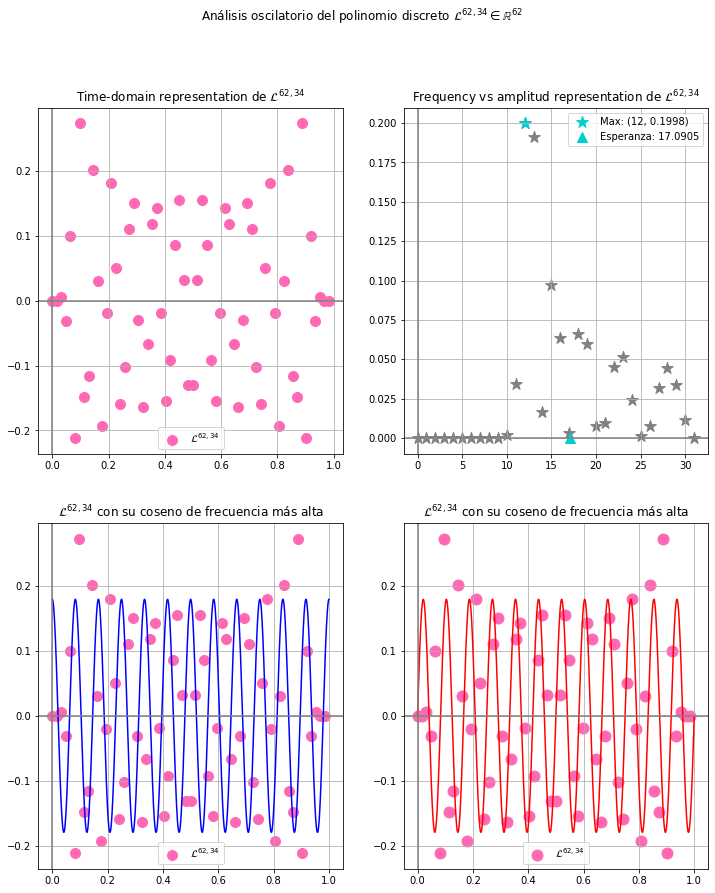

In [ ]:
#frecuencias_unPolLegendre(82,28)
#frecuencias_unPolLegendre(82,18)


#frecuencias_unPolLegendre(62,14)
frecuencias_unPolLegendre(62,34)

#frecuencias_unPolLegendre(60,45)
#frecuencias_unPolLegendre(60,30)
#frecuencias_unPolLegendre(60,32)
#frecuencias_unPolLegendre(60,20)
#frecuencias_unPolLegendre(61,29)
#Nota que, si n=30, en efecto no son 30 frecuencias las que se analizan, sino 15 (la mitad).

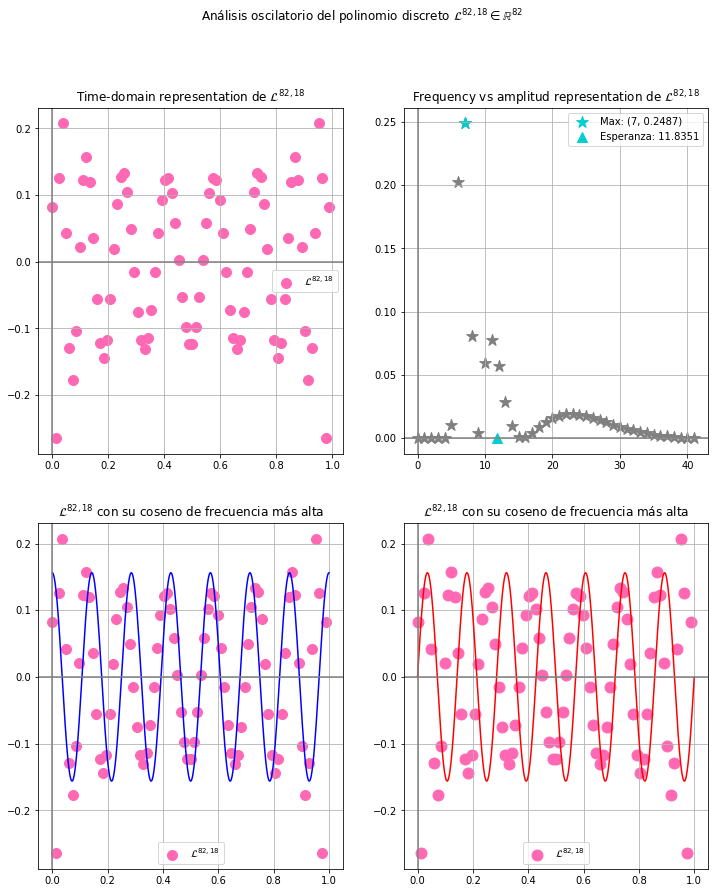

In [ ]:
frecuencias_unPolLegendre_random()

▶ Graficando las esperanzas de las $n$ distribuciones $\sigma_{n,k}$ 
asociadas a la dimensión $n$.

▶ **Gráfica 2**: Análisis de los polinomios discretos de Legendre de dimensión $n$.

Input: $n \in \mathbb{N}$, objeto de tipo 'int'. 

La figura consta de dos axis:


1. axis[0][0]: En el que se grafican las $n$ esperanzas de las distribuciones $\sigma_{n,k}$ (con $0 \leq k \leq n-1$). El eje horizontal es la dimensión $k$, el eje vertical es una recta real en la que se grafican las esperanzas.

2. axis[0][1]: En el que se grafican los puntos $(k, freq\_max(k))$, con $0 \leq k \leq n-1$.


⚫ TODO: Termina la descripción!



In [ ]:
def graficas_esperanzas(n):
  fig, axis= plt.subplots(1,1)
  fig.set_size_inches(10, 10)
  fig.suptitle(r"Análisis oscilatorio de los polinomios discretos de Legendre de grado $n$")

  #iteramos en la variable de grado k para obtener las esperanzas:
  esperanzas=np.array([funciones_estudioEspectral.calculando_sigmasYesp(n,k)[1] for k in range(n)])
  dominio=np.array([t for t in range(n)])
  axis.scatter(dominio, esperanzas, s=100, color="darkgoldenrod", marker="^")

  #Graficando la recta f(k)=k/2
  X=np.linspace(0,n,100)
  axis.plot(X, X/2, color='black', linestyle='dashed', label='Gráfica de la recta $y=\\frac{1}{2}k$')
  b0, b1= minimos_cuadrados.coef_RMC(dominio, esperanzas)
  axis.plot(X, b1*X+b0, color="mediumblue", linestyle='dashed', label='Ajuste lineal de mínimos cuadrados')

  #plt.xlabel("Grado $k$")
  #plt.axhline(y=0, color='gray')	
  #plt.axvline(x=0, color='gray')

  axis.set_title("Esperanzas de las distribuciones sigma de los pol. de Legendre de dimensión {0}".format(str(n)))

  plt.legend()
  plt.grid()
  return plt.show()

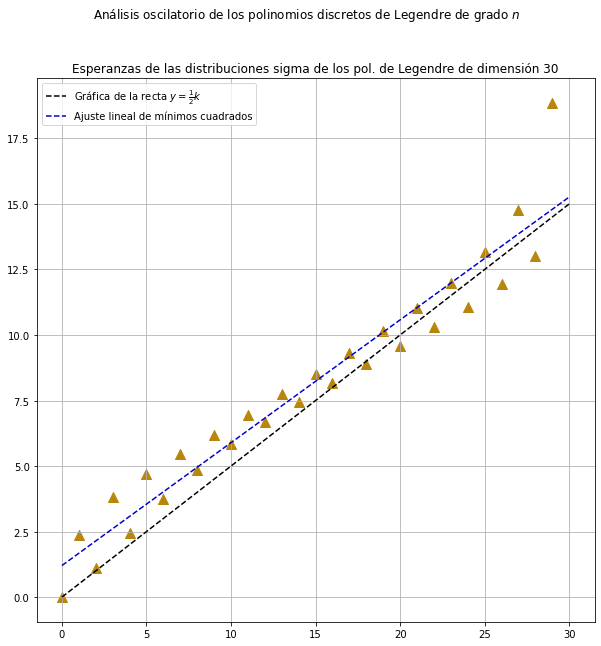

In [ ]:
graficas_esperanzas(30)

In [ ]:
def frecuencias_y_amplitud(n):
  """
  Se grafican las frecuencias a las que más respondieron los polinomios discretos de Legendre de 
  dimensión n, así como la amplitud de tal frecuencia.
  """

  fig, axis= plt.subplots(2,1)
  fig.set_size_inches(10, 10)
  fig.suptitle(r"Análisis oscilatorio de los polinomios discretos de Legendre de grado $n$")

  dominio=np.array([t for t in range(n)])
  sigmas=np.array([funciones_estudioEspectral.calculando_sigmasYesp(n,k)[0] for k in range(n)])


  #--------------- axis[1] --------------------------------------
  sigmas_max=[]
  for k in range(n):
    sigmas_max.append(max(sigmas[k]))  
 
  axis[1].scatter(dominio, sigmas_max, s=50, color="red", label='Amplitud asociada a la frecuencia máxima')
  #--------------- axis[0] --------------------------------------
  #Graficando el grado k versus la frecuencia a la que más respondió el polinomio de Legendre $\mathca{L}^{n,k}$.

  indices_sigmas_max=[] 
  for k in range(n):
    indices_sigmas_max.append(np.where(sigmas[k]==sigmas_max[k]))

  axis[0].scatter(dominio, indices_sigmas_max, s=100, color="green", marker="*", label='Frecuencia máxima')


  #X=np.linspace(0,n,100)
  #c0, c1= minimos_cuadrados.coef_RMC(dominio, sigmas_max)
  #axis[1].plot(X, c1*X+c0, color="mediumblue", linestyle='dashed', label='Ajuste lineal de mínimos cuadrados')

  #X=np.linspace(2,n-2,100)
  #d0, d1= minimos_cuadrados.coef_RMC(dominio, indices_sigmas_max)
  #axis[1].plot(X, d1*X+d0, color="mediumblue", linestyle='dashed', label='Ajuste lineal de mínimos cuadrados')

  for i in range(1):
    axis[i].grid(True)
    axis[i].legend()

  plt.legend()
  plt.grid()
  return plt.show()

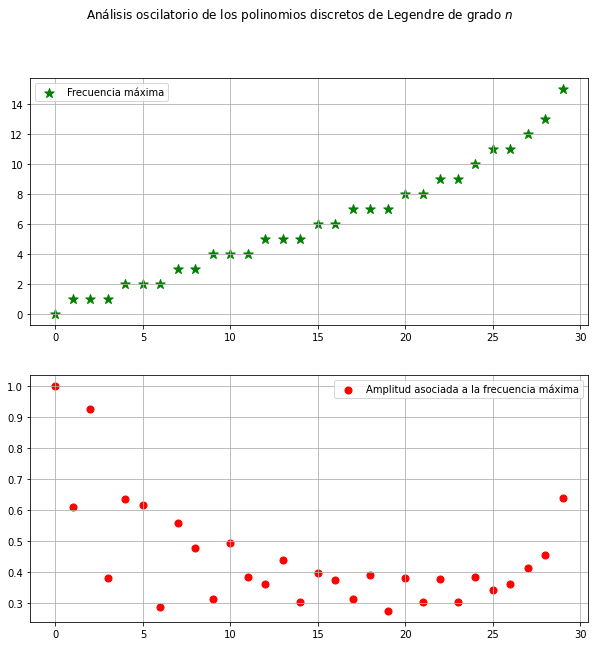

In [ ]:
frecuencias_y_amplitud(30)

# Nuevo código: 13 de marzo

Creo que no estaba calculando bien la base de Fourier ni los coeficientes sigma. Hago todo correctamente en el script 'nueva_base_Fourier_V0'.

In [ ]:
def nuevo_frecuencias_unPolLegendre(n, k, colores= colores_amelie):
  """
  Gráfica del k-ésimo polinomio discreto de Legendre de grado n, junto con la gráfica de su distribución sigma.
  """

  fig, axis= plt.subplots(2,2)
  fig.set_size_inches(12, 14)
  fig.suptitle(r"Análisis oscilatorio del polinomio discreto $ \mathcal{{ L }}^{{ {0} , {1} }} \in \mathbb{{ R }}^{{ {0}  }}$".format(str(n), str(k)) )
  
  x=legendre.calculo_base(n)[k] #vector de Legendre de nuestro interés.

  #----------- Axis[0,1] -------------------------
  sigmas=nueva_base_fourier_V0.coeficientes_sigma(x)
  num_freq=len(sigmas)
  dominio_freq=[t for t in range(num_freq)] #rango de frecuencias en el que se realiza el análisis.
  
  sigma_max=max(sigmas)
  indice_max=sigmas.index(sigma_max) #Esta es la frecuencia que se va a graficar junto con la gráfica del polinomio discreto L^{n,k}, pues es a la que más respondió este último.


  #TODO falta realizar normalizaciones en el vector de sigmas para que calcular la esperanza tenga sentido SIEMPRE. Esto no es necesario en la base clásica de Fourier.

  axis[0,1].scatter(dominio_freq, sigmas, s=150, color='gray', marker="*")
  axis[0,1].scatter(indice_max, sigmas[indice_max], s=150, color=colores_amelie[2], marker="*", label='Max: ('+str(indice_max )+', '+ str(round(sigmas[indice_max],4))+')')
  #axis[0,1].scatter(esp, 0, s=100, color=colores_amelie[2], marker="^", label='Esperanza: '+str(esp.round(4))) 
  axis[0,1].set_title(r'Frequency vs amplitud representation de $ \mathcal{{ L }}^{{ {0} , {1} }}$'.format(str(n), str(k)))

  #----------- Axis[0,0] -------------------------
  X=np.arange(0, 1, 0.0001)
  dominio=[k/n for k in range(n)]



  axis[0,0].scatter(dominio, x, s=100, color=colores_amelie[0], label='$ \mathcal{{ L }}^{{ {0} , {1} }}$'.format(str(n), str(k)))
  axis[0,0].set_title(r'Time-domain representation de $ \mathcal{{ L }}^{{ {0} , {1} }}$'.format(str(n), str(k)))

 #----------- Axis[1,0] y Axis[1,1] -------------------------
  axis[1,0].scatter(dominio, x, s=100, color=colores_amelie[0],  label='$ \mathcal{{ L }}^{{ {0} , {1} }}$'.format(str(n), str(k)))
  axis[1,0].plot(X, math.sqrt(2/n)*np.cos(2*pi*indice_max*X), color=colores_amelie[4])
  axis[1,0].set_title(r'$ \mathcal{{ L }}^{{ {0} , {1} }}$ con su coseno de frecuencia más alta'.format(str(n), str(k)))
  
  axis[1,1].scatter(dominio, x, s=120, color=colores_amelie[0],  label='$ \mathcal{{ L }}^{{ {0} , {1} }}$'.format(str(n), str(k)))
  axis[1,1].plot(X, math.sqrt(2/n)*np.sin(2*pi*indice_max*X), color=colores_amelie[5])
  axis[1,1].set_title(r'$ \mathcal{{ L }}^{{ {0} , {1} }}$ con su coseno de frecuencia más alta'.format(str(n), str(k)))


  for j in range(2):
    for i in range(2):
        axis[i,j].axhline(y=0, color='gray')
        axis[i,j].axvline(x=0, color='gray')
        axis[i,j].grid(True)
        axis[i,j].legend()

  return plt.show()


def frecuencias_unPolLegendre_random():
  n=(random.randint(2,100)) #generamos al azar una dimensión entre 2 y 100 (incluyendo extremos)
  k=(random.randint(0,n-1)) #generamos al azar un grado entre 0 y n (incluyendo extremos)
  #ejecutamos la función 'estudio_espectral' con estos valores.
  if True:
    frecuencias_unPolLegendre(n,k)

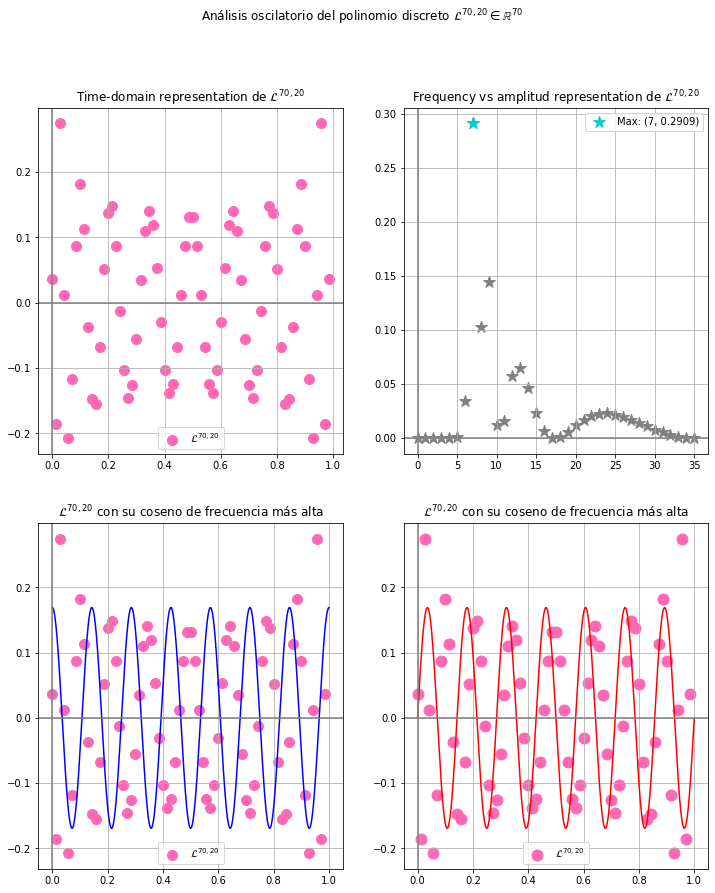

In [ ]:
nuevo_frecuencias_unPolLegendre(70,20, colores= colores_amelie)